
<br>
Implementação de um Perceptron com Regra Delta (Perceptron treinável com Gradiente)<br>
para discriminar dois caracteres: T e H, representados em uma matriz 3x3.<br>
Requisitos do problema:<br>
- Usar apenas um único neurônio (Perceptron com função de ativação sigmoid)<br>
- Treinar usando a Regra Delta (gradiente descendente simples)<br>
- Entrada: vetor com 9 elementos (matriz 3x3 flatten)<br>
- Saída: 1 quando a entrada for o padrão T, 0 quando for o padrão H<br>
- Exibir curva de erro durante o treinamento<br>
- Testar capacidade de generalização (entradas distorcidas)<br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List

===== Funções auxiliares =====

In [2]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    """
    Função de ativação sigmoid.
    Recebe um array numpy e devolve um array numpy de mesma forma.
    """
    return 1 / (1 + np.exp(-x))

In [3]:
def sigmoid_derivative(output: np.ndarray) -> np.ndarray:
    """
    Derivada da sigmoid em termos da própria saída.
    """
    return output * (1 - output)

In [4]:
def mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Calcula o erro quadrático médio (MSE) entre duas matrizes numpy.
    """
    return float(np.mean((y_true - y_pred) ** 2))

===== Perceptron com Regra Delta (Gradiente Descendente) =====

In [5]:
class PerceptronDelta:
    def __init__(self, n_inputs: int, lr: float = 0.1) -> None:
        """
        Inicializa os pesos aleatórios pequenos.
        Não tem bias, apenas pesos das entradas.
        """
        self.lr: float = lr
        self.weights: np.ndarray = np.random.randn(n_inputs) * 0.1  # Shape: (n_inputs,)
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Faz uma predição para um conjunto de entradas.
        Entrada:
            X: matriz numpy (n_amostras, n_features)
        Saída:
            Vetor numpy com uma saída sigmoid por amostra → shape: (n_amostras,)
        """
        net: np.ndarray = X.dot(self.weights)   # Shape: (n_amostras,)
        out: np.ndarray = sigmoid(net)          # Shape: (n_amostras,)
        return out
    def train(self, X: np.ndarray, y: np.ndarray, epochs: int = 1000) -> List[float]:
        """
        Treina o perceptron por múltiplas épocas.
        X.shape = (n_amostras, n_features)
        y.shape = (n_amostras, 1)
        """
        error_history: List[float] = []
        for ep in range(epochs):
            net: np.ndarray = X.dot(self.weights)                    # Net input: (n_amostras,)
            output: np.ndarray = sigmoid(net).reshape(-1, 1)         # Output: (n_amostras,1)

            # Por que reshape? → Para garantir o mesmo shape de y (n_amostras,1)
            error: np.ndarray = y - output                           # Erro por amostra: (n_amostras,1)
            error_history.append(mse(y, output))                    # MSE dessa época
            grad: np.ndarray = error * sigmoid_derivative(output)    # Gradiente por amostra: (n_amostras,1)

            # Atualização de pesos: soma os gradientes de todas as amostras
            update: np.ndarray = X.T.dot(grad).flatten()             # Update final: shape: (n_features,)
            self.weights += self.lr * update                         # Ajuste dos pesos
        return error_history

===== Dados de entrada (Caracteres T e H em 3x3) =====

In [6]:
T: np.ndarray = np.array([
    [1,1,1],
    [0,1,0],
    [0,1,0]
])

In [7]:
H: np.ndarray = np.array([
    [1,0,1],
    [1,1,1],
    [1,0,1]
])

Flatten para transformar 3x3 em vetor de 9 posições

In [8]:
X: np.ndarray = np.vstack([T.flatten(), H.flatten()])  # Shape: (2,9)
y: np.ndarray = np.array([[1], [0]])                  # Saídas: 1 para T, 0 para H → shape: (2,1)

===== Treinamento =====

In [9]:
perceptron: PerceptronDelta = PerceptronDelta(n_inputs=9, lr=0.5)
error_history: List[float] = perceptron.train(X, y, epochs=500)

===== Curva de erro =====

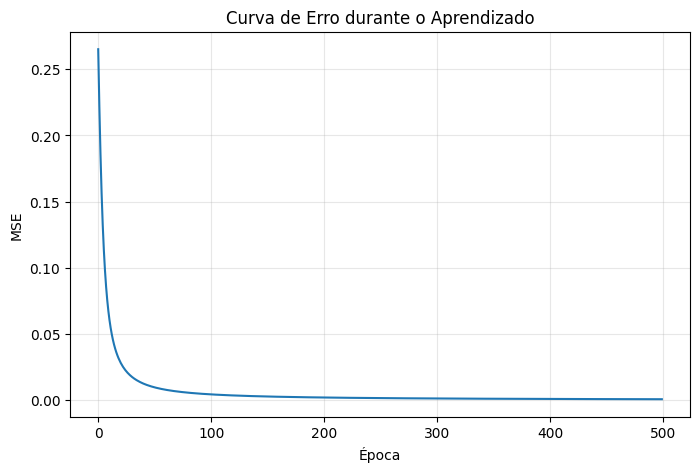

In [10]:
plt.figure(figsize=(8,5))
plt.plot(error_history)
plt.xlabel("Época")
plt.ylabel("MSE")
plt.title("Curva de Erro durante o Aprendizado")
plt.grid(True, alpha=0.3)
plt.show()

===== Testes com padrões originais =====

In [11]:
print("\n=== TESTES COM PADRÕES IDEAIS ===")
for name, pattern in [("T", T), ("H", H)]:
    input_pattern: np.ndarray = pattern.flatten().reshape(1, -1)
    pred: float = perceptron.predict(input_pattern)[0]
    print(f"{name}: saída contínua = {pred:.3f}, classe = {'T' if pred>0.5 else 'H'}")


=== TESTES COM PADRÕES IDEAIS ===
T: saída contínua = 0.971, classe = T
H: saída contínua = 0.026, classe = H


===== Testes com distorções =====

T distorcido (flip em um pixel)

In [12]:
distorted_T: np.ndarray = T.copy()
distorted_T[0,0] = 0
print("\n=== TESTE COM T DISTORCIDO ===")
pred_dist: float = perceptron.predict(distorted_T.flatten().reshape(1, -1))[0]
print(f"T distorcido: saída = {pred_dist:.3f}, classe = {'T' if pred_dist>0.5 else 'H'}")


=== TESTE COM T DISTORCIDO ===
T distorcido: saída = 0.961, classe = T


H distorcido (flip em um pixel)

In [13]:
distorted_H: np.ndarray = H.copy()
distorted_H[1,1] = 0
print("\n=== TESTE COM H DISTORCIDO ===")
pred_dist_H: float = perceptron.predict(distorted_H.flatten().reshape(1, -1))[0]
print(f"H distorcido: saída = {pred_dist_H:.3f}, classe = {'T' if pred_dist_H>0.5 else 'H'}")


=== TESTE COM H DISTORCIDO ===
H distorcido: saída = 0.020, classe = H
